### The Machine Learning Algorithms

[1. Linear Regression](#1)

[2. Logistic Regression](#2)

[3. Naive Bayes](#3)

[4. K-nearest Neighbors (kNN)](#4)

[5. Random Forest](#5)

[6. Decision Tree Classifier](#6)

In [1]:
#importing the libaries needed for model traning and testing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
import math 
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
from sklearn import preprocessing, linear_model, metrics
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
warnings.filterwarnings('ignore')


### Enconding categorical variables (Date, WindDir3pm, etc.)

In [2]:
AusWeather = pd.read_csv('data/cleaned_data.csv')
AusWeather = AusWeather.drop(columns=["Unnamed: 0"])

# Date
AusWeather['Date'] = pd.to_datetime(AusWeather['Date'])
# Add 3 more columns: Day, Month and Year
AusWeather.insert(1, 'Year', AusWeather['Date'].dt.year)
AusWeather.insert(1, 'Month', AusWeather['Date'].dt.month)
AusWeather.insert(1, 'Day', AusWeather['Date'].dt.day)
AusWeather.drop(columns=['Date'], axis=1, inplace=True)

# The remaining categorical columns
rain_tomorrow = AusWeather.iloc[:,-1]
risk_mm = AusWeather.iloc[:,-2]
re_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday']
AusWeather = pd.get_dummies(AusWeather, columns=re_columns)
AusWeather.drop(columns=['RISK_MM', 'RainTomorrow'], axis=1, inplace=True)
AusWeather['RISK_MM'] = risk_mm
AusWeather['RainTomorrow'] = rain_tomorrow
AusWeather.columns

Index(['Day', 'Month', 'Year', 'MinTemp', 'MaxTemp', 'Rainfall',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       ...
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW', 'RainToday_No', 'RainToday_Yes',
       'RISK_MM', 'RainTomorrow'],
      dtype='object', length=116)

## 1. Linear Regression <a id="1"></a>

In [52]:
data = AusWeather.copy()
X = data.iloc[:, 3:15]
y = data['RISK_MM']

# Scale the range of X down to [0,1]
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)
X

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,0.534031,0.492958,0.021739,0.513514,0.512821,0.545455,0.670455,0.22,0.773110,0.789666,0.497423,0.503614
1,0.376963,0.544601,0.000000,0.513514,0.102564,0.500000,0.363636,0.25,0.794199,0.794708,0.505155,0.563855
2,0.520942,0.558685,0.000000,0.540541,0.487179,0.590909,0.295455,0.30,0.772383,0.801191,0.603093,0.537349
3,0.424084,0.612676,0.000000,0.243243,0.282051,0.204545,0.375000,0.16,0.845104,0.830724,0.528351,0.616867
4,0.641361,0.713615,0.036232,0.472973,0.179487,0.454545,0.795455,0.33,0.795654,0.781742,0.520619,0.693976
...,...,...,...,...,...,...,...,...,...,...,...,...
142188,0.274869,0.467136,0.000000,0.337838,0.384615,0.295455,0.534091,0.27,0.896736,0.891231,0.304124,0.481928
142189,0.256545,0.504695,0.000000,0.337838,0.333333,0.250000,0.443182,0.24,0.896009,0.884748,0.322165,0.518072
142190,0.277487,0.549296,0.000000,0.216216,0.333333,0.204545,0.500000,0.21,0.888010,0.876105,0.342784,0.568675
142191,0.324607,0.586854,0.000000,0.418919,0.230769,0.204545,0.465909,0.24,0.869829,0.859537,0.384021,0.607229


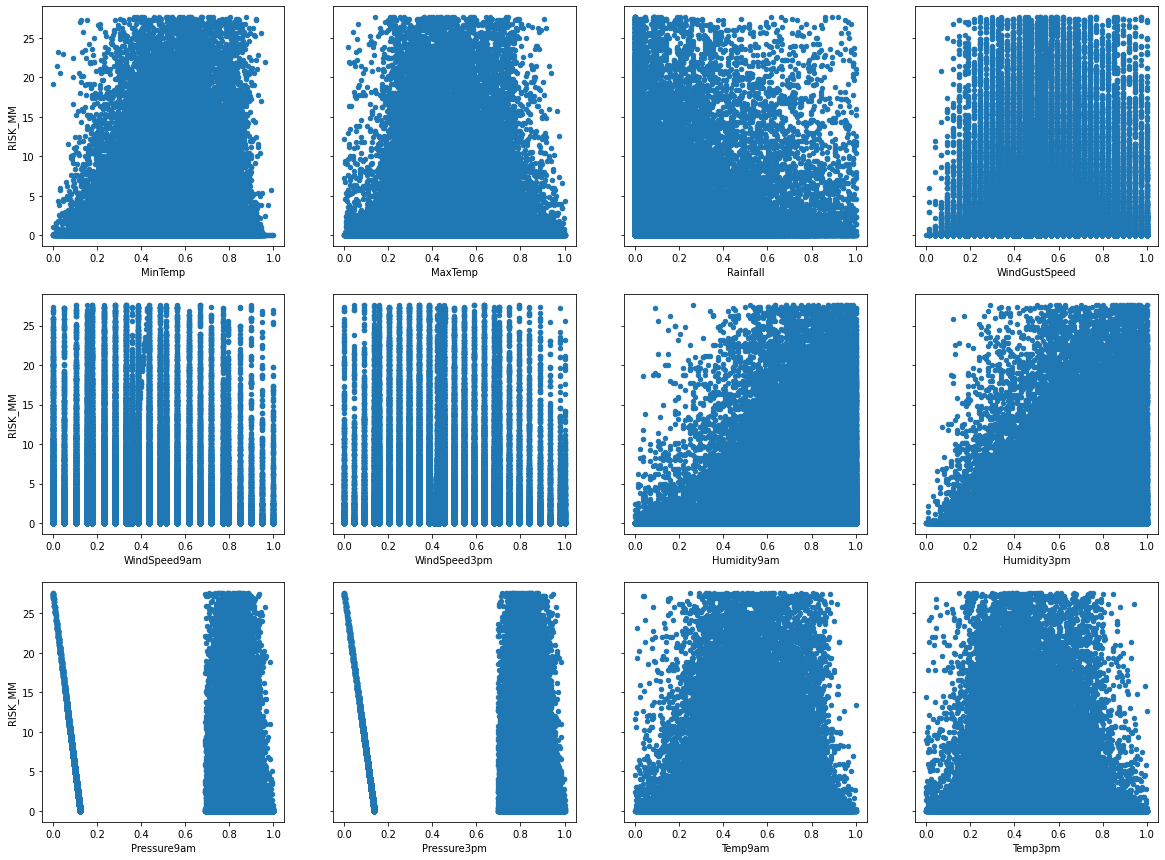

In [28]:
# Plot the variables and "RISK_MM" to explore their correlation
data_plot = X.copy()
x_axis = data_plot.columns
data_plot['RISK_MM'] = y

fig, axs = plt.subplots(3, 4, sharey=True)
for i in range(len(x_axis)):
    data_plot.plot(kind='scatter', x=x_axis[i], y='RISK_MM', ax=axs[int(i/4),i%4], figsize=(20, 15))

In [53]:
for column in X.columns:
    pearson_cof = pearsonr(X[column],y)[0]
    print("CorrCoef bewteen {0} and RISK_MM is {1:.3f}".format(column, pearson_cof))

CorrCoef bewteen MinTemp and RISK_MM is 0.084
CorrCoef bewteen MaxTemp and RISK_MM is -0.104
CorrCoef bewteen Rainfall and RISK_MM is 0.230
CorrCoef bewteen WindGustSpeed and RISK_MM is 0.181
CorrCoef bewteen WindSpeed9am and RISK_MM is 0.059
CorrCoef bewteen WindSpeed3pm and RISK_MM is 0.044
CorrCoef bewteen Humidity9am and RISK_MM is 0.203
CorrCoef bewteen Humidity3pm and RISK_MM is 0.369
CorrCoef bewteen Pressure9am and RISK_MM is -0.052
CorrCoef bewteen Pressure3pm and RISK_MM is -0.053
CorrCoef bewteen Temp9am and RISK_MM is -0.000
CorrCoef bewteen Temp3pm and RISK_MM is -0.135


In [54]:
"""
These above graphs and their Pearson correlation coefficients are around 0
implies there are weak relationships between continuous variables and RISK_MM.
Therefore, it is difficult to train Linear Regeression with high accuracy score.
However, let try with the highest one, Humidity3pm, in terms of absolute value.
"""
print("Go next")

Go next


Score: 0.209
R^2 Score: 0.209
MSE: 11.696429886754684


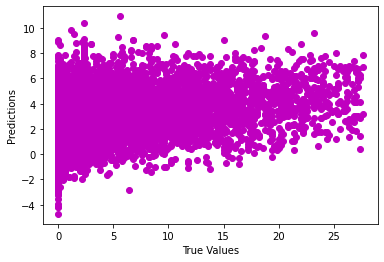

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)


plt.scatter(y_test, y_predict, color='m')
plt.xlabel("True Values")
plt.ylabel("Predictions")

print("Score: {:.3f}".format(model.score(X_test, y_test)))
print("R^2 Score: {:.3f}".format(metrics.r2_score(y_test, y_predict)))
mse = np.mean((y_predict - y_test) ** 2)
print("MSE: {}".format(mse))

In [35]:
"""
The score accuracy computed by two method were low and
the MSE shows the discrepancy bewteen 2 variables are quite big.
Consequently, the model is underfitting and Linear Regression is not suitable to train AusWeather dataset
"""
print("Go next")

Go next


## 2. Logistic Regression<a id="2"></a>

In [102]:
data = AusWeather.copy()
X = data.iloc[:, 3:-2]
y = data.iloc[:, -1]

# Scale the range of X down to [0,1]
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [103]:
# Create a model
logistic_reg = linear_model.LogisticRegression(C=1e19, solver='liblinear', random_state=0)

# Fit the model
model = logistic_reg.fit(X_train, y_train)

# Predictions
y_predict = logistic_reg.predict(X_test)

In [104]:
print('The accuracy score of model: {:.3f}'.format(metrics.accuracy_score(y_test, y_predict)))
print('The accuracy score of training set: {:.4f}'.format(logistic_reg.score(X_train, y_train)))
print('The accuracy score of testing set: {:.4f}'.format(logistic_reg.score(X_test, y_test)))

The accuracy score of model: 0.847
The accuracy score of training set: 0.8433
The accuracy score of testing set: 0.8470


In [114]:
"""
The test-set and train-set accuracy are quite comparable, 
so the model is neither overfitting nor underfitting. And, the accuracy score is high.
Theerefore, the Logistic Regression model performs well in rain tomorrow prediction.
"""
print("Go next")

Go next


## 3. Naive Bayes<a id="3"></a>

In [56]:
# For all categrical variables
data = AusWeather.copy()
X = data.iloc[:, 15:-2]
y = data.iloc[:, -1]
y.replace({'No': 0, 'Yes': 1},inplace = True)
X

,Location_Adelaide,Location_Albany,Location_Albury,Location_Alice Springs,Location_Badgerys Creek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
142189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
142190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
142191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [57]:
# Split data inrot training and test set with 80% and 20% respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Create a Gaussian Classifier  model
gnb = GaussianNB()

# Fit the model to training set
model = gnb.fit(X_train, y_train)

# Predictions
y_predict = gnb.predict(X_test)

In [58]:
print('The accuracy score of model: {:.3f}'.format(metrics.accuracy_score(y_test, y_predict)))
print('The accuracy score of training set: {:.4f}'.format(gnb.score(X_train, y_train)))
print('The accuracy score of testing set: {:.4f}'.format(gnb.score(X_test, y_test)))

The accuracy score of model: 0.577
The accuracy score of training set: 0.5773
The accuracy score of testing set: 0.5773


In [132]:
"""
The accuracy score are low, so it do not perform well to decide
whether it will rain tomorrow or not. In other words, it can 
predict on tomorrow weather less accurately
"""
print("Go next")

Go next


## 4. K-nearest Neighbors (kNN)<a id="4"></a>

In [60]:
data = AusWeather.copy()
X = data.iloc[:, 3:15]
y = data.iloc[:, -1]
y.replace({'No': 0, 'Yes': 1},inplace = True)

# Scale the range of X down to [0,1]
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,0.534031,0.492958,0.021739,0.513514,0.512821,0.545455,0.670455,0.22,0.773110,0.789666,0.497423,0.503614
1,0.376963,0.544601,0.000000,0.513514,0.102564,0.500000,0.363636,0.25,0.794199,0.794708,0.505155,0.563855
2,0.520942,0.558685,0.000000,0.540541,0.487179,0.590909,0.295455,0.30,0.772383,0.801191,0.603093,0.537349
3,0.424084,0.612676,0.000000,0.243243,0.282051,0.204545,0.375000,0.16,0.845104,0.830724,0.528351,0.616867
4,0.641361,0.713615,0.036232,0.472973,0.179487,0.454545,0.795455,0.33,0.795654,0.781742,0.520619,0.693976
...,...,...,...,...,...,...,...,...,...,...,...,...
142188,0.274869,0.467136,0.000000,0.337838,0.384615,0.295455,0.534091,0.27,0.896736,0.891231,0.304124,0.481928
142189,0.256545,0.504695,0.000000,0.337838,0.333333,0.250000,0.443182,0.24,0.896009,0.884748,0.322165,0.518072
142190,0.277487,0.549296,0.000000,0.216216,0.333333,0.204545,0.500000,0.21,0.888010,0.876105,0.342784,0.568675
142191,0.324607,0.586854,0.000000,0.418919,0.230769,0.204545,0.465909,0.24,0.869829,0.859537,0.384021,0.607229


### k = 5

In [13]:
# Create a kNN model with k = 5
knn = KNeighborsClassifier(5 ,weights='uniform')

# Fit the model to training set
model = knn.fit(X_train, y_train)

# Predictions
y_predict = knn.predict(X_test)

# Accuracy Score 
print('The accuracy score of training set: {:.4f}'.format(knn.score(X_train, y_train)))
print('The accuracy score of testing set: {:.4f}'.format(knn.score(X_test, y_test)))

The accuracy score of training set: 0.8747
The accuracy score of testing set: 0.8328


### k = 21

In [20]:
# Create a kNN model with k = 21
knn = KNeighborsClassifier(21 ,weights='uniform')

# Fit the model to training set
model = knn.fit(X_train, y_train)

# Predictions
y_predict = knn.predict(X_test)

# Accuracy Score 
print('The accuracy score of training set: {:.4f}'.format(knn.score(X_train, y_train)))
print('The accuracy score of testing set: {:.4f}'.format(knn.score(X_test, y_test)))

The accuracy score of training set: 0.8539
The accuracy score of testing set: 0.8451


 ### k takes odd values from 1 to 100

In [41]:
k_range = range(1,101,2)
# Apply 10-fold cross-valation for every single value in k_range and
# return training scores and test scores
train_scores, test_scores = validation_curve(knn, X_train, y_train, 
                                              param_name="n_neighbors", 
                                              param_range=k_range,
                                              cv=10, scoring="accuracy")

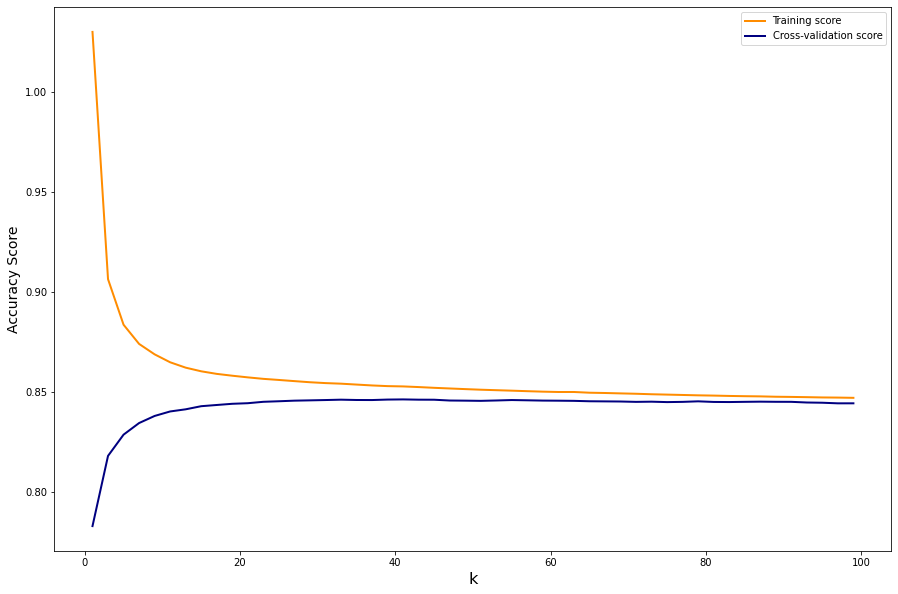

In [65]:
fig, ax = plt.subplots(figsize=(15,10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

ax.plot(k_range, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
ax.plot(k_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=2)
ax.set_xlabel("k", fontsize=16)
ax.set_ylabel("Accuracy Score", fontsize=14)
ax.legend(loc="best")
# df = pd.DataFrame({"Training Score": train_scores_mean + 0.03, "Test Score": test_scores_mean + 0.03})
# df.to_csv("knn.csv")

In [56]:
"""
The line of training score experienced the downward trend while 
the cross-validation line witnessed the upward trend. These lines 
intend to intersection as the n_neighbors value increment. If k runs 
from 0 to around 20, the model is overffiting, because the training scores
are good but the cross-validation scores are poor.
"""
print("Go next")

Go next


In [61]:
# Create a kNN model with k = 99
knn = KNeighborsClassifier(99 ,weights='uniform')

# Fit the model to training set
model = knn.fit(X_train, y_train)

# Predictions
y_predict = knn.predict(X_test)

# Accuracy Score 
print('The accuracy score of training set: {:.4f}'.format(knn.score(X_train, y_train)))
print('The accuracy score of testing set: {:.4f}'.format(knn.score(X_test, y_test)))

The accuracy score of training set: 0.8447
The accuracy score of testing set: 0.8443


### Try with dimensionality reduction PCA

In [62]:
data = AusWeather.copy()
X = data.iloc[:, 3:15]
y = data.iloc[:, -1]
y.replace({'No': 0, 'Yes': 1},inplace = True)

# Scale the range of X down to [0,1]
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)

# Reduce big dimensions to 3 dimensions
pca = PCA(3)
X = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X

array([[ 0.16747511, -0.02149809,  0.11782784],
       [ 0.20722145,  0.02057427, -0.18273998],
       [ 0.39210701, -0.00247471,  0.1222302 ],
       ...,
       [ 0.03993647, -0.10974212, -0.35557935],
       [ 0.11214705, -0.06535716, -0.32714517],
       [ 0.16189862, -0.05130589, -0.34455464]])

In [63]:
# Create a kNN model with k = 99
knn = KNeighborsClassifier(99 ,weights='uniform')

# Fit the model to training set
model = knn.fit(X_train, y_train)

# Predictions
y_predict = knn.predict(X_test)

# Accuracy Score 
print('The accuracy score of training set: {:.4f}'.format(knn.score(X_train, y_train)))
print('The accuracy score of testing set: {:.4f}'.format(knn.score(X_test, y_test)))

The accuracy score of training set: 0.8175
The accuracy score of testing set: 0.8176


In [66]:
"""
The dataset was applied PCA to reduce its dimension to train model 
faster, but the model were less accurate and the difference between the
train-set and test-set scores was bigger, which indicates overfitting 
Therefore, there is no need to use PCA, but in comparison of training speed,
PCA-applied dataset was trained faster. 
"""
print("Go next")

Go next


## 5. Random Forest<a id="5"></a>

## 6. Decision Tree Classifier<a id="6"></a>